In [1713]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from datetime import datetime
from datetime import datetime, date

Feature 1 Read data - Read data from a csv file. 

In [1714]:
df = pd.read_csv("HRDataSet.csv")
df.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2


Feature 2 - Manipulate and clean your data: Converted Date of Hire to date format to extract the year of hire (this data will be used later in a chart). Calculated tenure from Date of Hire and calculated age from Date of Birth. 

In [1715]:
df.DOB.head()

0    7/10/1983
1     5/5/1975
2    9/19/1988
3    9/27/1988
4     9/8/1989
Name: DOB, dtype: object

In [1716]:
df.DOB[0]
type(df.DOB[0])

str

In [1717]:
df.DOB=pd.to_datetime(df.DOB).dt.date
df.DOB.head()

0    1983-07-10
1    1975-05-05
2    1988-09-19
3    1988-09-27
4    1989-09-08
Name: DOB, dtype: object

In [1718]:
type(df.DOB[0])

datetime.date

In [1719]:
# converting date of hire to a date format
df.DateofHire=pd.to_datetime(df.DateofHire).dt.date
df.DateofHire.head()

0    2011-07-05
1    2015-03-30
2    2011-07-05
3    2008-01-07
4    2011-07-11
Name: DateofHire, dtype: object

In [1720]:
type(df.DateofHire[0])

datetime.date

In [1721]:
# extracting the year from the Date of Hire
df['year'] = pd.DatetimeIndex(df['DateofHire']).year
display(df.year)

0      2011
1      2015
2      2011
3      2008
4      2011
       ... 
306    2014
307    2008
308    2010
309    2015
310    2014
Name: year, Length: 311, dtype: int64

In [1722]:
# This function calculates tenure of employee based on date of hire
def calculate_tenure(hire_date):
    today = date.today()
    return today.year - hire_date.year - ((today.month, 
                                      today.day) < (hire_date.month, 
                                                    hire_date.day))
  
df['Tenure'] = df['DateofHire'].apply(calculate_tenure)
  
display(df.Tenure)

0      11
1       7
2      11
3      14
4      11
       ..
306     8
307    13
308    12
309     7
310     7
Name: Tenure, Length: 311, dtype: int64

In [1723]:
  
# This function converts age based on date of birth
def calculate_age(born_date):
    today = date.today()
    return today.year - born_date.year - ((today.month, 
                                      today.day) < (born_date.month, 
                                                    born_date.day))
  
df['Age'] = df['DOB'].apply(calculate_age)
  
display(df.Age)

0      39
1      47
2      33
3      33
4      32
       ..
306    37
307    40
308    42
309    43
310    43
Name: Age, Length: 311, dtype: int64

In [1724]:
df.columns

Index(['Employee_Name', 'EmpID', 'MarriedID', 'MaritalStatusID', 'GenderID',
       'EmpStatusID', 'DeptID', 'PerfScoreID', 'FromDiversityJobFairID',
       'Salary', 'Termd', 'PositionID', 'Position', 'State', 'Zip', 'DOB',
       'Sex', 'MaritalDesc', 'CitizenDesc', 'HispanicLatino', 'RaceDesc',
       'DateofHire', 'DateofTermination', 'TermReason', 'EmploymentStatus',
       'Department', 'ManagerName', 'ManagerID', 'RecruitmentSource',
       'PerformanceScore', 'EngagementSurvey', 'EmpSatisfaction',
       'SpecialProjectsCount', 'LastPerformanceReview_Date', 'DaysLateLast30',
       'Absences', 'year', 'Tenure', 'Age'],
      dtype='object')

Feature 3 -  Analyze your data: Counted number of males and females per employment status, calculated mean of salary, tenure, and age per gender. Utilized .unstack, .replace, .rename, .groupby function for calculations. 

Feature 4 and 5 Visualize your data and Interpret your data: Created a pie chart to show the percentage of active females versus males. Created a line chart to show the gender hiring trend over the years. Create a bar chart to show the salary average difference between genders. Markdown with analysis of the data is included. 

In [1725]:
status_df=df.groupby(['Sex','EmploymentStatus']).size().unstack().reset_index()

status_df.head()

EmploymentStatus,Sex,Active,Terminated for Cause,Voluntarily Terminated
0,F,116,9,51
1,M,91,7,37


Analysis: Company currently has more female employees than male employees. Also, more females have left the company for a voluntary reasons and for involuntary reasons (terminated for cause). 

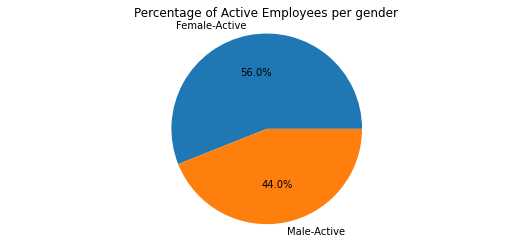

In [1726]:
# Pie chart

Tasks = [116, 91]

my_labels = 'Female-Active','Male-Active'
plt.pie(Tasks,labels=my_labels,autopct='%1.1f%%')
plt.title('Percentage of Active Employees per gender')
plt.axis('equal')
plt.show()

Analysis: The majority of the active employees are females with 56% and males are 44%. 

In [1727]:
hiring_df=df.groupby(['year','Sex']).size().unstack().reset_index()
hiring_df.head()

Sex,year,F,M
0,2006,NaN,1.0
1,2007,NaN,2.0
2,2008,3.0,NaN
3,2009,5.0,2.0
4,2010,5.0,4.0


In [1728]:
hiring_df.columns
hiring_df = hiring_df.rename(columns={'M ': 'M'})
hiring_df['M'] = hiring_df['M'].replace(np.nan, 0)
hiring_df['F'] = hiring_df['F'].replace(np.nan, 0)


In [1729]:
hiring_df.M.head()

0    1.0
1    2.0
2    0.0
3    2.0
4    4.0
Name: M, dtype: float64

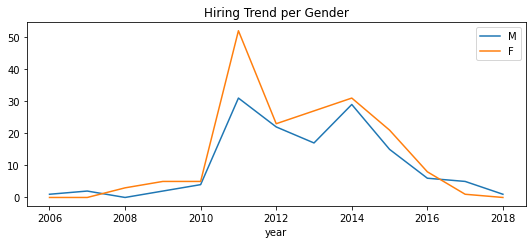

In [1730]:
#Line chart

ax = plt.gca()
  
#use plot() method on the dataframe
hiring_df.plot( x = 'year' , y = 'M',  ax = ax )
hiring_df.plot( x = 'year' , y = 'F' ,  ax = ax)
ax.set_title('Hiring Trend per Gender')

plt.show()

Analysis: This chart shows the company hiring trend per gender. Over the years the company has hired more females than males. The year of 2011 shows the largest difference in number of females hired versus males hired. 

In [1731]:
df.groupby(df.Sex).agg(mean_age=('Age','mean'),mean_salary=("Salary","mean"),mean_tenure=('Tenure','mean'),count_gender=('Sex','count'))

,mean_age,mean_salary,mean_tenure,count_gender
Sex,,,,
F,43.079545,67786.727273,9.107955,176
M,42.807407,70629.400000,8.874074,135


Analysis: The table shows the differences between gender from the company. Females are in average 43 years old, have a average salary of 67786.72, and have in average 9 years of tenure. Males are in average 42 years old, have a average salary of 70629.4, and are have in average 8 years of tenure. This shows that although females have in average higher tenure their salary is average lower than males salary. 

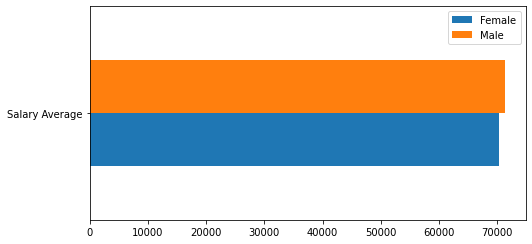

In [1736]:
# Bar chart

data = {'Female': [70215.5],
        'Male': [71303.9] }
df = pd.DataFrame(data,columns=['Female','Male'], index = ['Salary Average'] )

# Multiple horizontal bar chart

df.plot.barh()

# Display

plt.show()

Analysis: Although this company has hired more Female than Males over the years, and Females have higher tenure. Males have higher average salary than Females. 